In [2]:
import pandas as pd

bf = pd.read_csv('bodyfat.csv')

bf.head()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7


In [3]:
bf.shape

(100, 10)

# To see multicolinearity

In [5]:
correlations = bf.iloc[ : , 1::].corr() # it is only shpwing x variables correlation

<AxesSubplot:>

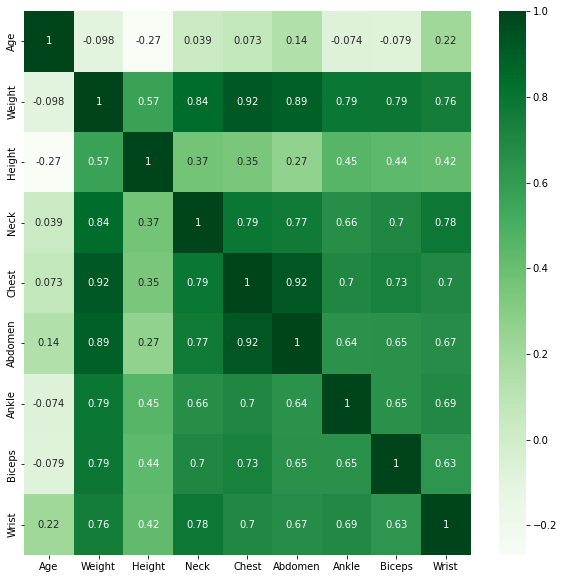

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(correlations, annot=True, cmap = 'Greens')

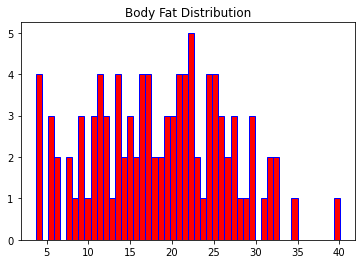

In [13]:
plt.hist(bf.Bodyfat, color = 'r', bins = 50, edgecolor = 'b')
plt.title('Body Fat Distribution')
plt.show()

Text(0.5, 1.0, 'Normal Distribution')

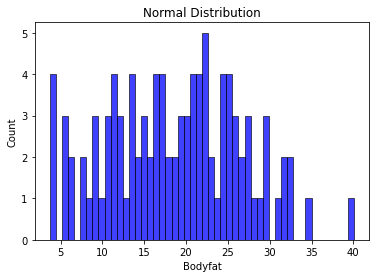

In [18]:
sns.histplot(bf.Bodyfat, bins = 50, color='b')
plt.title('Normal Distribution')

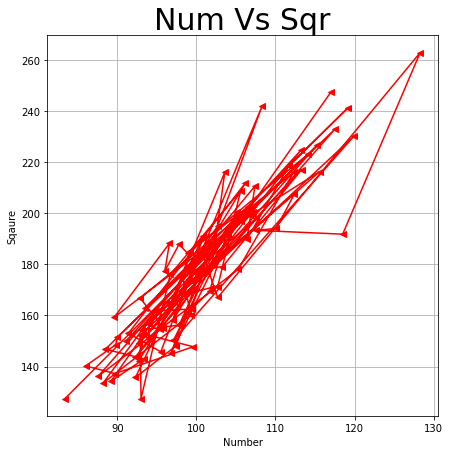

In [19]:
plt.figure(figsize = (7,7))
plt.plot(bf.Chest, bf.Weight, marker="<", color='r')
plt.xlabel("Number")
plt.ylabel('Sqaure')
plt.title('Num Vs Sqr', size=30)
plt.grid()

In [27]:
plt.hist(bf.Bodyfat, bf.Age, color = 'r',bins = len(bf.Age.unique()), edgecolor = 'b')
plt.title('Body Fat Distribution')
plt.show()

TypeError: hist() got multiple values for argument 'bins'

In [7]:
bf.columns

Index(['Bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Ankle', 'Biceps', 'Wrist'],
      dtype='object')

In [8]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bodyfat  100 non-null    float64
 1   Age      100 non-null    int64  
 2   Weight   100 non-null    float64
 3   Height   100 non-null    float64
 4   Neck     100 non-null    float64
 5   Chest    100 non-null    float64
 6   Abdomen  100 non-null    float64
 7   Ankle    100 non-null    float64
 8   Biceps   100 non-null    float64
 9   Wrist    100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


In [9]:
bf.Bodyfat.describe()

count    100.000000
mean      18.601000
std        8.006683
min        3.700000
25%       12.375000
50%       18.950000
75%       24.575000
max       40.100000
Name: Bodyfat, dtype: float64

In [13]:
bf_x = bf.iloc[ : , 1::]
bf_y = bf.iloc[ : ,0]

# Build a Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

lin_bf = LinearRegression()

lin_bf.fit(bf_x, bf_y)

LinearRegression()

In [22]:
Rsquare_lin = lin_bf.score(bf_x, bf_y)  
Rsquare_lin

0.757471814567421

In [26]:
pred_lin = lin_bf.predict(bf_x)

err_lin = bf_y - pred_lin
mse_lin = np.mean(np.square(err_lin))
#print(err_lin)
print(mse_lin)

15.392269321317324


# Ridge Implementation

In [29]:
from sklearn.linear_model import Ridge

rid_bf = Ridge()
rid_bf.fit(bf_x, bf_y)
Rsquare_lin = rid_bf.score(bf_x, bf_y)  
Rsquare_lin

0.7574436753876161

In [30]:
pred_rid = rid_bf.predict(bf_x)

err_rid = bf_y - pred_rid
mse_rid = np.mean(np.square(err_lin))
#print(err_lin)
print(mse_rid)

15.392269321317324


# Lasso implementation

In [32]:
from sklearn.linear_model import Lasso

las_bf = Lasso()
las_bf.fit(bf_x, bf_y)
Rsquare_las = las_bf.score(bf_x, bf_y)  
Rsquare_las

0.7315521962084665

In [33]:
pred_las = las_bf.predict(bf_x)

err_las = bf_y - pred_las
mse_las = np.mean(np.square(err_las))
#print(err_lin)
print(mse_las)

17.037281202205282


In [34]:
# compare the Beta Values

In [39]:
print('Intercept',lin_bf.intercept_)
print('===============')
print('Beta Vals',lin_bf.coef_)

Intercept -23.664199886469792
Beta Vals [ 8.37793344e-02 -8.33221931e-02  3.59322556e-02  1.12299488e-03
 -1.38741586e-01  1.03274094e+00  2.25942608e-01  1.48276392e-01
 -2.20339906e+00]


In [43]:
print('Intercept',rid_bf.intercept_)
print('===============')
print('Beta Vals',list(rid_bf.coef_))

Intercept -23.934516627559507
Beta Vals [0.08163351848683262, -0.0842158757028082, 0.03312491732399934, -0.013235660629592381, -0.1368397117054755, 1.0327911018226676, 0.20932576276169368, 0.14674991467517504, -2.1210462103146055]


In [42]:
print('Intercept',las_bf.intercept_)
print('===============')
print('Beta Vals',list(las_bf.coef_))

Intercept -46.878426421527195
Beta Vals [0.014594621279991022, -0.1352519356100266, -0.0, -0.0, -0.0, 0.9668877689527671, -0.0, 0.0, -0.0]


In [48]:
df_with_slopes  = pd.DataFrame({"Columns":bf_x.columns ,
                               'Slope_Linear' : lin_bf.coef_,
                               'Slope_Ridge' : rid_bf.coef_,
                               'Slope_Lasso' : las_bf.coef_})
df_with_slopes

,Columns,Slope_Linear,Slope_Ridge,Slope_Lasso
0,Age,0.083779,0.081634,0.014595
1,Weight,-0.083322,-0.084216,-0.135252
2,Height,0.035932,0.033125,-0.000000
3,Neck,0.001123,-0.013236,-0.000000
4,Chest,-0.138742,-0.136840,-0.000000
5,Abdomen,1.032741,1.032791,0.966888
6,Ankle,0.225943,0.209326,-0.000000
7,Biceps,0.148276,0.146750,0.000000
8,Wrist,-2.203399,-2.121046,-0.000000
